In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [107]:
df = pd.read_csv("./data/train.csv")

In [108]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


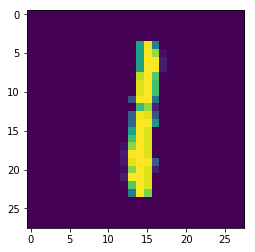

In [57]:
# plot a random digit from the training set
plt.imshow(np.reshape(np.array(df.sample())[0][1:],(28,28)))
plt.show()

In [76]:
for column in df.columns:
    if column != "label":
        df[column] = [x/255 for x in df[column]]

In [109]:
#plt.imshow(np.reshape(np.array(df.sample())[0][1:],(28,28)))
#plt.show()

df.shape

(42000, 785)

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [121]:
model = Sequential()
model.add(Dense(360,activation="relu",input_dim=784))
model.add(Dense(180,activation="relu",input_dim=360))
model.add(Dense(90,activation="relu",input_dim=180))
model.add(Dense(45,activation="relu",input_dim=90))
model.add(Dense(20,activation="relu",input_dim=45))
model.add(Dense(10,activation="relu",input_dim=20))


model.compile(optimizer="rmsprop",
             loss='categorical_crossentropy',
             metrics=["accuracy"])


In [110]:
def get_labels_array(labels):
    result = []
    for label in labels:
        result.append([1 if label == x else 0 for x in range(0,10)])
    return result

In [135]:
#y = get_labels_array(df["label"])
#y = np.array(y)
y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
#df.drop(df["label"],inplace=True)
df.drop("label",axis=1,inplace=True)

In [136]:
x_train,x_test,y_train,y_test = train_test_split(df,y,train_size=0.7)

/Users/Kuba/code/data-science/digit-recogniser/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [137]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
model.fit(x_train,y_train,epochs=200,batch_size=1000)

Epoch 1/200
29399/29399 [==============================] - 1s 43us/step - loss: nan - acc: 0.0993
Epoch 2/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 3/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 4/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 5/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 6/200
29399/29399 [==============================] - 1s 31us/step - loss: nan - acc: 0.0987
Epoch 7/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 8/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 9/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 10/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 11/200
29399/

29399/29399 [==============================] - 1s 31us/step - loss: nan - acc: 0.0987
Epoch 84/200
29399/29399 [==============================] - 1s 29us/step - loss: nan - acc: 0.0987
Epoch 85/200
29399/29399 [==============================] - 1s 29us/step - loss: nan - acc: 0.0987
Epoch 86/200
29399/29399 [==============================] - 1s 29us/step - loss: nan - acc: 0.0987
Epoch 87/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 88/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 89/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 90/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 91/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 92/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 93/200
29399/2939

29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 166/200
29399/29399 [==============================] - 1s 29us/step - loss: nan - acc: 0.0987
Epoch 167/200
29399/29399 [==============================] - 1s 29us/step - loss: nan - acc: 0.0987
Epoch 168/200
29399/29399 [==============================] - 1s 29us/step - loss: nan - acc: 0.0987
Epoch 169/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 170/200
29399/29399 [==============================] - 1s 31us/step - loss: nan - acc: 0.0987
Epoch 171/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 172/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 173/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 174/200
29399/29399 [==============================] - 1s 30us/step - loss: nan - acc: 0.0987
Epoch 175/200


In [139]:
score = model.evaluate(x_test,y_test,batch_size = 200)

12601/12601 [==============================] - 0s 18us/step


In [140]:
score

[nan, 0.09769065966777182]

In [145]:
plt.imshow(np.reshape(x_test.sample(),(28,28)))
plt.show()

ValueError: Shape of passed values is (28, 28), indices imply (784, 1)